In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
dataset1 = pd.read_csv('dataset.csv')  #read the dataset
dataset1.head()   

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Removing Hyphen from strings in the dataset.

In [3]:
for col in dataset1.columns:    
    dataset1[col] = dataset1[col].str.replace('_',' ')
dataset1

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Characteristics of dataset

In [4]:
dataset1.describe()

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
null_checker = dataset1.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

             count
Disease          0
Unnamed: 1       0
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4     348
Unnamed: 5    1206
Unnamed: 6    1986
Unnamed: 7    2652
Unnamed: 8    2976
Unnamed: 9    3228
Unnamed: 10   3408
Unnamed: 11   3726
Unnamed: 12   4176
Unnamed: 13   4416
Unnamed: 14   4614
Unnamed: 15   4680
Unnamed: 16   4728
Unnamed: 17   4848


#Graph of Symptoms against Frequency before removing NULL values

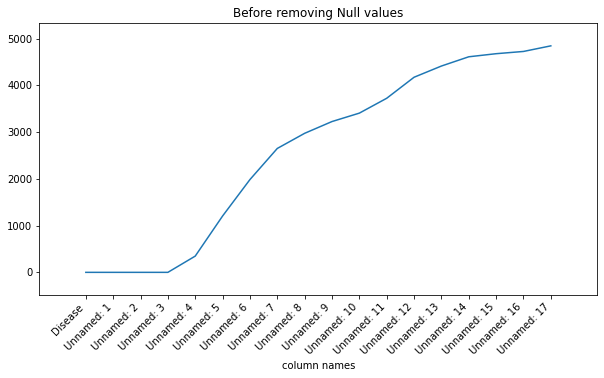

In [6]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [7]:
cols = dataset1.columns
data = dataset1[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(dataset1.shape)

dataset1 = pd.DataFrame(s, columns=dataset1.columns)
dataset1.head()

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Replacing NULL values(NaN) with 0

In [8]:
dataset1 = dataset1.fillna(0)
dataset1.head()

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
dataset2 = pd.read_csv('Symptom_severity.csv')
dataset2['Symptom'] = dataset2['Symptom'].str.replace('_',' ')
dataset2

,Symptom,Severity
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
...,...,...
127,small dents in nails,2
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2


#Fetching unique symptoms

In [10]:
dataset2['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

Encoding symptoms in the dataset with the symptom rank

In [11]:
val1 = dataset1.values
symptoms = dataset2['Symptom'].unique()

for i in range(len(symptoms)):
    val1[val1 == symptoms[i]] = dataset2[dataset2['Symptom'] == symptoms[i]]['Severity'].values[0]
    
dataframe1 = pd.DataFrame(val1, columns=cols)
dataframe1

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,foul smell of urine,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


Assign zero to symptoms with no rank

In [12]:
dataframe1 = dataframe1.replace('dischromic  patches', 0)
dataframe1 = dataframe1.replace('spotting  urination',0)
dataset1 = dataframe1.replace('foul smell of urine',0)
dataset1.head(10)

,Disease,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Checking if whole column is zero valued to drop those values

In [13]:
null_value_checker = dataset1.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_value_checker)

             count
Disease          0
Unnamed: 1       0
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4       0
Unnamed: 5       0
Unnamed: 6       0
Unnamed: 7       0
Unnamed: 8       0
Unnamed: 9       0
Unnamed: 10      0
Unnamed: 11      0
Unnamed: 12      0
Unnamed: 13      0
Unnamed: 14      0
Unnamed: 15      0
Unnamed: 16      0
Unnamed: 17      0


#Graph of how many columns have been altered by removing NULL values

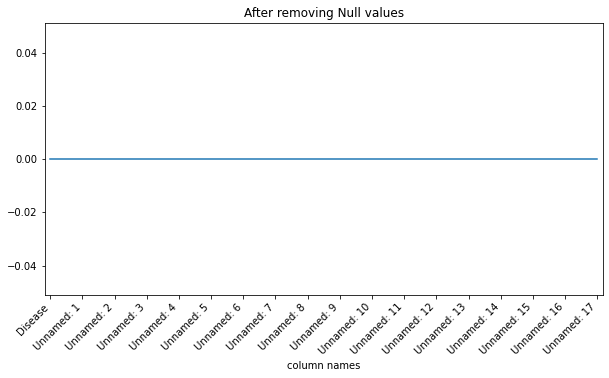

In [14]:
plt.figure(figsize=(10,5))
plt.plot(null_value_checker.index, null_value_checker['count'])
plt.xticks(null_value_checker.index, null_value_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [15]:
print("Number of symptoms used to identify the disease ",len(dataset2['Symptom'].unique()))
print("Number of diseases that can be identified ",len(dataset1['Disease'].unique()))

Number of symptoms used to identify the disease  131
Number of diseases that can be identified  41


In [16]:
dataset1['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

#Select the features as symptoms column and label as Disease column

In [17]:
data = dataset1.iloc[:,1:].values
disease_labels = dataset1['Disease'].values
disease_labels

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

#Splitting the dataset to training 80 and testing 20(percent)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, disease_labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


#Training the model to predict using Decision tree algorithm

In [19]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
predict_1=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, predict_1)
print('F1-score% =', f1_score(y_test, predict_1, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, predict_1)*100)

F1-score% = 96.74280393430182 | Accuracy% = 96.64634146341463


#Function to predict the Disease, using given Symptoms.

In [20]:
def getPrediction(S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,x):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    print(psymptoms)
    a = np.array(dataset2["Symptom"])
    b = np.array(dataset2["Severity"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    psy = [psymptoms]

    pred2 = x.predict(psy)
    return pred2[0]

#Function to provide Precautions for the Predicted Disease.

In [21]:
def getPrecaution(prediction):
  pf = pd.read_csv('symptom_precaution.csv')
  data1 = pf.iloc[:,:].values
  j=[0,0,0,0]
  for i in data1:
    if i[0]==prediction:
      j[0]=i[1]
      j[1]=i[2]
      j[2]=i[3]
      j[3]=i[4]
      break
    else:
      continue
  return j

In [22]:
sympList=dataset2["Symptom"].to_list()

#Printing Symptoms for User Input

In [23]:
for i in range(0,len(sympList),4):
  print(sympList[i],"\t\t",sympList[i+1],"\t\t",sympList[i+2],"\t\t",sympList[i+3])

itching 		 skin rash 		 nodal skin eruptions 		 continuous sneezing
shivering 		 chills 		 joint pain 		 stomach pain
acidity 		 ulcers on tongue 		 muscle wasting 		 vomiting
burning micturition 		 spotting urination 		 fatigue 		 weight gain
anxiety 		 cold hands and feets 		 mood swings 		 weight loss
restlessness 		 lethargy 		 patches in throat 		 irregular sugar level
cough 		 high fever 		 sunken eyes 		 breathlessness
sweating 		 dehydration 		 indigestion 		 headache
yellowish skin 		 dark urine 		 nausea 		 loss of appetite
pain behind the eyes 		 back pain 		 constipation 		 abdominal pain
diarrhoea 		 mild fever 		 yellow urine 		 yellowing of eyes
acute liver failure 		 fluid overload 		 swelling of stomach 		 swelled lymph nodes
malaise 		 blurred and distorted vision 		 phlegm 		 throat irritation
redness of eyes 		 sinus pressure 		 runny nose 		 congestion
chest pain 		 weakness in limbs 		 fast heart rate 		 pain during bowel movements
pain in anal region 		 bloody st

#Getting Symptoms from the User as Input, and predicting the Disease using Decision Tree algorithm and Displaying it along with it's Precautions. 

In [24]:
inpSymptoms=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
inp=input("Please enter your symptoms as shown and enter \"done\" ")
i=0
while(inp!="done"):
  if(inp not in sympList):
    print("Enter a symptom from the list");
  elif(inpSymptoms[16]!=0):
    break
  else:
    inpSymptoms[i]=inp
    i=i+1
  inp=input("Please enter your symptoms as shown and enter \"done\" ")

prediction=getPrediction(inpSymptoms[0],inpSymptoms[1],inpSymptoms[2],inpSymptoms[3],inpSymptoms[4],inpSymptoms[5],inpSymptoms[6],inpSymptoms[7],inpSymptoms[8],inpSymptoms[9],inpSymptoms[10],inpSymptoms[11],inpSymptoms[12],inpSymptoms[13],inpSymptoms[14],inpSymptoms[15],inpSymptoms[16],tree)
precaution=getPrecaution(prediction)
print("\n")
print("the predicted disease is ", prediction)
print("precautions to be taken are", precaution)

Please enter your symptoms as shown and enter "done" visual disturbances
Please enter your symptoms as shown and enter "done" lack of concentration
Please enter your symptoms as shown and enter "done" yellow crust ooze
Please enter your symptoms as shown and enter "done" puffy face and eyes
Please enter your symptoms as shown and enter "done" done
['visual disturbances', 'lack of concentration', 'yellow crust ooze', 'puffy face and eyes', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


the predicted disease is  Osteoarthristis
precautions to be taken are ['acetaminophen', 'consult nearest hospital', 'follow up', 'salt baths']
